# Initialization

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

# Import Data

In [61]:
data = pd.read_csv('marketing_campaign_data.csv')

In [62]:
data.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Feature Engineering

In [63]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['age'] = 2022 - data['Year_Birth']
data['join_at_age'] = data['Dt_Customer'].dt.year - data['Year_Birth']
data['total_kids'] = data['Kidhome'] + data['Teenhome']
data['is_parents'] = np.where(data['total_kids'] > 0, 1, 0)

# age_range
data.loc[(data['age'] >= 0) & (data['age'] < 12), 'age_range'] = "child"
data.loc[(data['age'] >= 12) & (data['age'] < 18), 'age_range'] = "teens"
data.loc[(data['age'] >= 18) & (data['age'] < 36), 'age_range'] = "young_adults"
data.loc[(data['age'] >= 36) & (data['age'] < 55), 'age_range'] = "middle_aged_adults"
data.loc[(data['age'] >= 55), 'age_range'] = "older_adults"

# amount spent
data['total_amount_spent'] = data['MntCoke'] \
                              + data['MntFruits'] \
                              + data['MntMeatProducts'] \
                              + data['MntFishProducts'] \
                              + data['MntSweetProducts'] \
                              + data['MntGoldProds']

# accepted campaigns
data['total_accepted_campaign'] = data['AcceptedCmp1'] \
                                    + data['AcceptedCmp2'] \
                                    + data['AcceptedCmp3'] \
                                    + data['AcceptedCmp4'] \
                                    + data['AcceptedCmp5']

# total transaction purchased --- WE ASSUMED ALL OF THIS PURCHASES ARE MECE (mutually exclusive and collectively exhaustive)
data['total_transaction'] = data['NumDealsPurchases'] \
                            + data['NumWebPurchases'] \
                            + data['NumCatalogPurchases'] \
                            + data['NumStorePurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

data['cvr'] = data.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis=1)

In [64]:
data.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr
136,136,5342,1976,SMA,Cerai,9548000.0,1,0,2012-08-08,31,0,1000,3000,10000,6000,9000,2,1,0,3,8,0,0,0,0,0,0,3,11,0,46,36,1,1,middle_aged_adults,29000,0,6,0.750000
292,292,4543,1980,S1,Menikah,82497000.0,0,0,2012-10-31,32,777000,129000,573000,216000,21000,203000,1,2,7,9,4,0,0,1,0,0,0,3,11,0,42,32,0,0,middle_aged_adults,1919000,1,19,4.750000
92,92,5798,1973,S2,Bertunangan,NaN,0,0,2013-11-23,87,445000,37000,359000,98000,28000,18000,1,2,4,8,1,0,0,0,0,0,0,3,11,0,49,40,0,0,middle_aged_adults,985000,0,15,15.000000
1876,1876,3766,1959,S2,Janda,33051000.0,0,0,2012-08-16,15,100000,71000,243000,108000,94000,219000,3,9,1,8,9,0,0,0,0,0,0,3,11,1,63,53,0,0,older_adults,835000,0,21,2.333333
1589,1589,2612,1987,S1,Menikah,75794000.0,0,0,2013-12-24,33,754000,160000,625000,63000,32000,48000,1,7,5,12,3,0,0,0,1,0,0,3,11,0,35,26,0,0,young_adults,1682000,1,25,8.333333


# EDA: Conversion Rate Analysis based on Income, Spending and Age

## Statistical Descriptive

In [65]:
numerical = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'age', 'join_at_age', 'total_kids', 'total_amount_spent'
                     ]

categorical = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parents', 'age_range'
                       ]

In [66]:
data[numerical].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,join_at_age,total_kids,total_amount_spent
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,53.194196,44.222321,0.950446,6.057982e+05
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,12.022855,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,26.000000,16.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,45.000000,36.000000,0.000000,6.875000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,52.000000,43.000000,1.000000,3.960000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,63.000000,54.000000,1.000000,1.045500e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,129.000000,121.000000,3.000000,2.525000e+06


In [67]:
data[categorical].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate Analysis

### Correlation Heatmap

<AxesSubplot:>

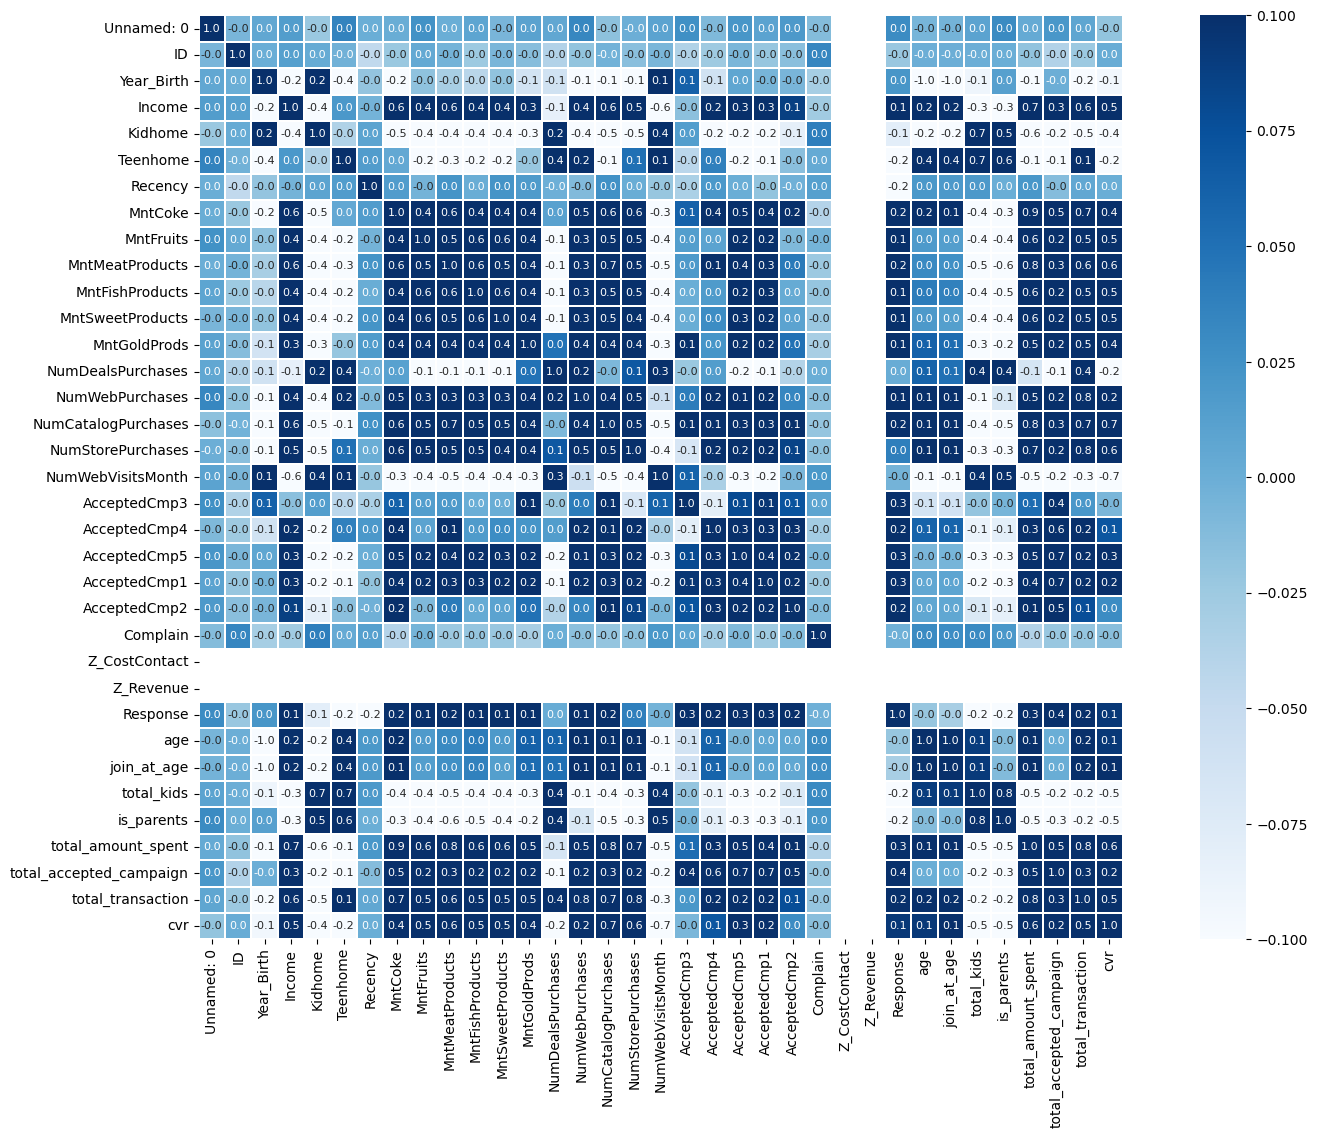

In [68]:
# correlation heatmap
plt.figure(figsize=(20, 12))
corrmat = data.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

### Income vs Spending

(0.0, 120000000.0)

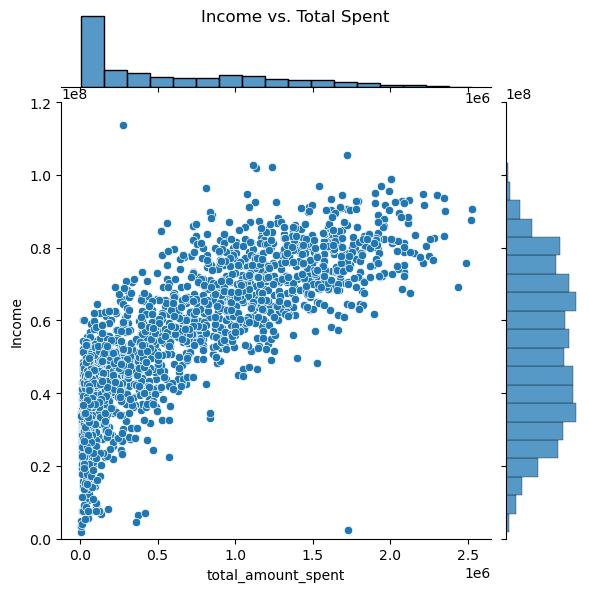

In [69]:
plot = sns.jointplot(x=data["total_amount_spent"], y=data["Income"])
plt.suptitle('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

(0.0, 120000000.0)

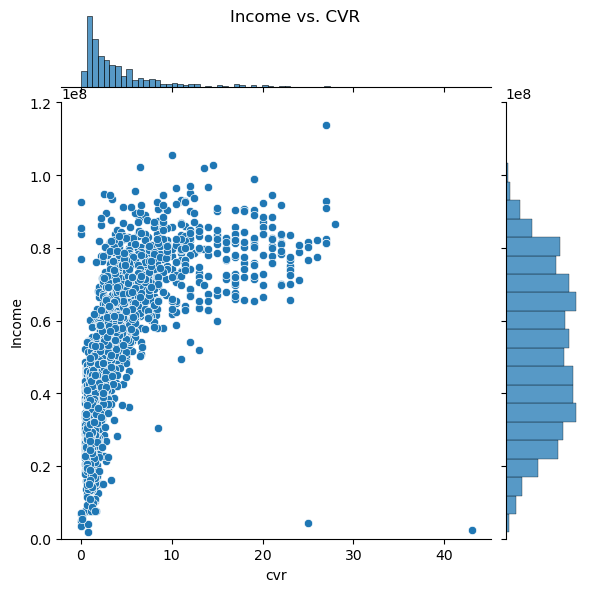

In [70]:
plot = sns.jointplot(x=data["cvr"], y=data["Income"])
plt.suptitle('Income vs. CVR')
plot.ax_marg_y.set_ylim(0, 120000000)

### Age vs Spending & Income

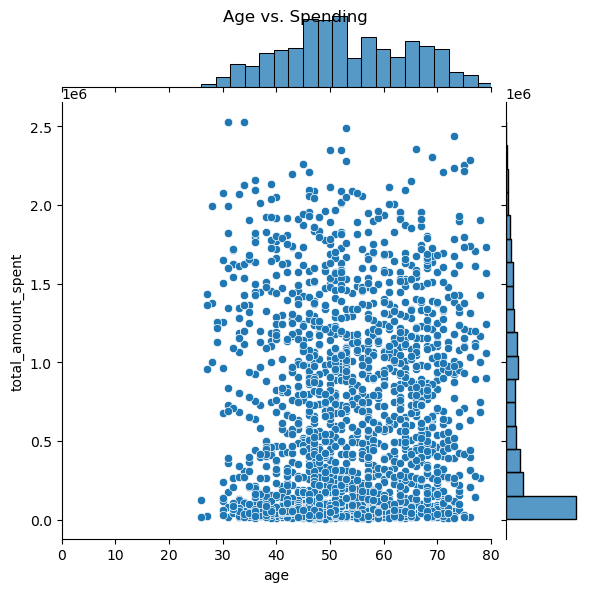

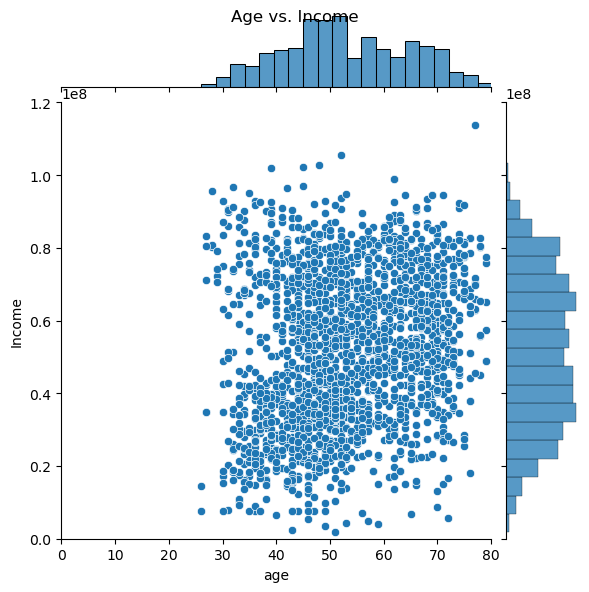

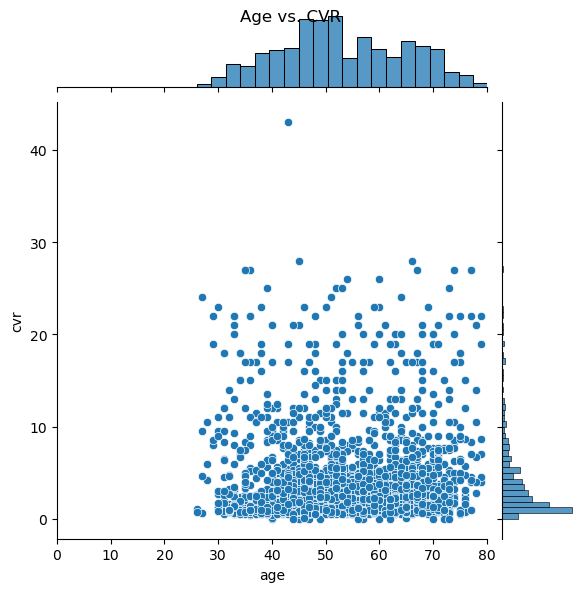

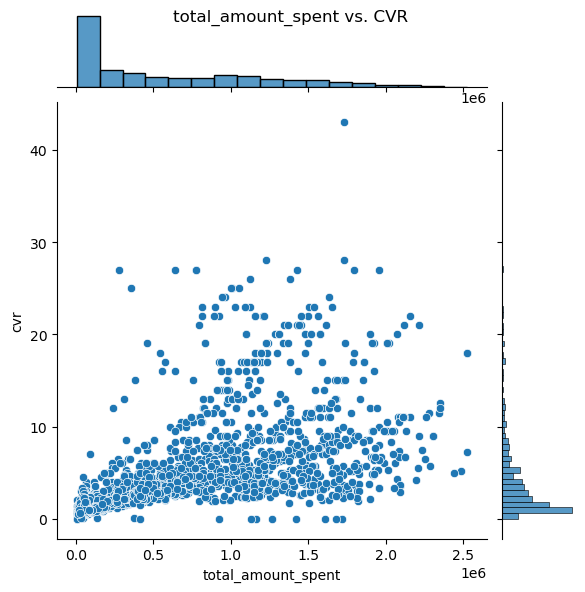

In [71]:
plot = sns.jointplot(x=data["age"], y=data["total_amount_spent"])
plt.suptitle('Age vs. Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=data["age"], y=data["Income"])
plt.suptitle('Age vs. Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

plot = sns.jointplot(x=data["age"], y=data["cvr"])
plt.suptitle('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=data["total_amount_spent"], y=data["cvr"])
plt.suptitle('total_amount_spent vs. CVR')
# plot.ax_marg_x.set_xlim(0, 80)
plt.show()

# Data Cleaning & Preprocessing

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2240 non-null   int64         
 1   ID                       2240 non-null   int64         
 2   Year_Birth               2240 non-null   int64         
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2240 non-null   int64         
 7   Teenhome                 2240 non-null   int64         
 8   Dt_Customer              2240 non-null   datetime64[ns]
 9   Recency                  2240 non-null   int64         
 10  MntCoke                  2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

## Handle Missing Values

In [73]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
age                         0
join_at_age                 0
total_kids                  0
is_parents

We have null values in Income column, with 24 rows (1.07% of data). since the number is quite low, we can remove this safely

In [74]:
data = data.dropna(subset='Income')

## Handle Duplicate Values

In [75]:
data.duplicated(subset='ID').sum()

0

We have no duplicated data (0)

In [76]:
data.shape

(2216, 39)

## Feature Encoding

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2216 non-null   int64         
 1   ID                       2216 non-null   int64         
 2   Year_Birth               2216 non-null   int64         
 3   Education                2216 non-null   object        
 4   Marital_Status           2216 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2216 non-null   int64         
 7   Teenhome                 2216 non-null   int64         
 8   Dt_Customer              2216 non-null   datetime64[ns]
 9   Recency                  2216 non-null   int64         
 10  MntCoke                  2216 non-null   int64         
 11  MntFruits                2216 non-null   int64         
 12  MntMeatProducts          2216 non-

In [78]:
to_drop = ['Unnamed: 0']

data = data.drop(columns=to_drop)

In [79]:
data[categorical]

,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents,age_range
0,S1,Lajang,0,0,0,0,0,0,1,0,older_adults
1,S1,Lajang,0,0,0,0,0,0,0,1,older_adults
2,S1,Bertunangan,0,0,0,0,0,0,0,0,older_adults
3,S1,Bertunangan,0,0,0,0,0,0,0,1,middle_aged_adults
4,S3,Menikah,0,0,0,0,0,0,0,1,middle_aged_adults
...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,Menikah,0,0,0,0,0,0,0,1,older_adults
2236,S3,Bertunangan,1,0,0,0,0,0,0,1,older_adults
2237,S1,Cerai,0,0,0,1,0,0,0,0,middle_aged_adults
2238,S2,Bertunangan,0,0,0,0,0,0,0,1,older_adults


In [80]:
for col in categorical:
    print(f'value counts of column {col}')
    print(data[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
0    2074
1     142
Name: AcceptedCmp1, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
0    2186
1      30
Name: AcceptedCmp2, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
0    2053
1     163
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
0    2052
1     164
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
0    2054
1     162
Name: AcceptedCmp5, dtype: int64
------------------------------ 

value counts o

Perform encoding on the 'Education' column, as the data is ordinal, it will be transformed according to the order using mapping.

In [81]:
edu_mapping = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

new_data = data.copy()
new_data['Education'] = new_data['Education'].map(edu_mapping)

Perform one hot encoding on the 'Marital_Status' and 'age_range' columns as the data is nominal.

In [82]:
data_encoded = new_data.copy()
# One hot encoder
for cat in ['Marital_Status', 'age_range']:
    onehots = pd.get_dummies(new_data[cat], prefix=cat)
    data_encoded = data_encoded.join(onehots)

In [83]:
data_encoded.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,age_range_middle_aged_adults,age_range_older_adults,age_range_young_adults
0,5524,1957,2,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0,older_adults,1617000,0,25,3.571429,0,0,0,0,1,0,0,1,0
1,2174,1954,2,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1,older_adults,27000,0,6,1.200000,0,0,0,0,1,0,0,1,0
2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0,older_adults,776000,0,21,5.250000,1,0,0,0,0,0,0,1,0
3,6182,1984,2,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1,middle_aged_adults,53000,0,8,1.333333,1,0,0,0,0,0,1,0,0
4,5324,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1,middle_aged_adults,422000,0,19,3.800000,0,0,0,0,0,1,1,0,0


### Drop Unimportant Columns

In [84]:
to_drop = ['Marital_Status', 'Dt_Customer', 'age_range']

data_final = data_encoded.drop(columns=to_drop)

## Standardization

In [85]:
from sklearn.preprocessing import StandardScaler

data_std = new_data.copy()
scaler = StandardScaler()

for col in numerical:
    data_std[col] = scaler.fit_transform(data_std[[col]])

display(data_std.shape, data_std.head(3))

(2216, 38)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr
0,5524,1957,2,Lajang,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,0.986443,0.897752,-1.264803,0,older_adults,1.675488,0,25,3.571429
1,2174,1954,2,Lajang,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0.0,0.0,0,1.236801,1.313688,1.405806,1,older_adults,-0.962358,0,6,1.200000
2,4141,1965,2,Bertunangan,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0.0,0.0,0,0.318822,0.315443,-1.264803,0,older_adults,0.280250,0,21,5.250000


In [86]:
display(new_data.shape, new_data.head(3))

(2216, 38)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr
0,5524,1957,2,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0,older_adults,1617000,0,25,3.571429
1,2174,1954,2,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1,older_adults,27000,0,6,1.200000
2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0,older_adults,776000,0,21,5.250000


# Modeling: K-Means Clustering

## Elbow Method

[104357.21965506379, 77987.73445441779, 61652.36836583134, 55343.15638363013, 50312.12964007016, 46904.7008946434, 43896.02029590341, 41424.98383228289, 40017.362973949785, 38809.052677002954, 37629.41707588759, 36804.63151040449, 35881.145593858724, 35182.21906830285, 34450.10520404355, 33813.88775651712, 33257.33901476103, 32662.890141160475]


<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

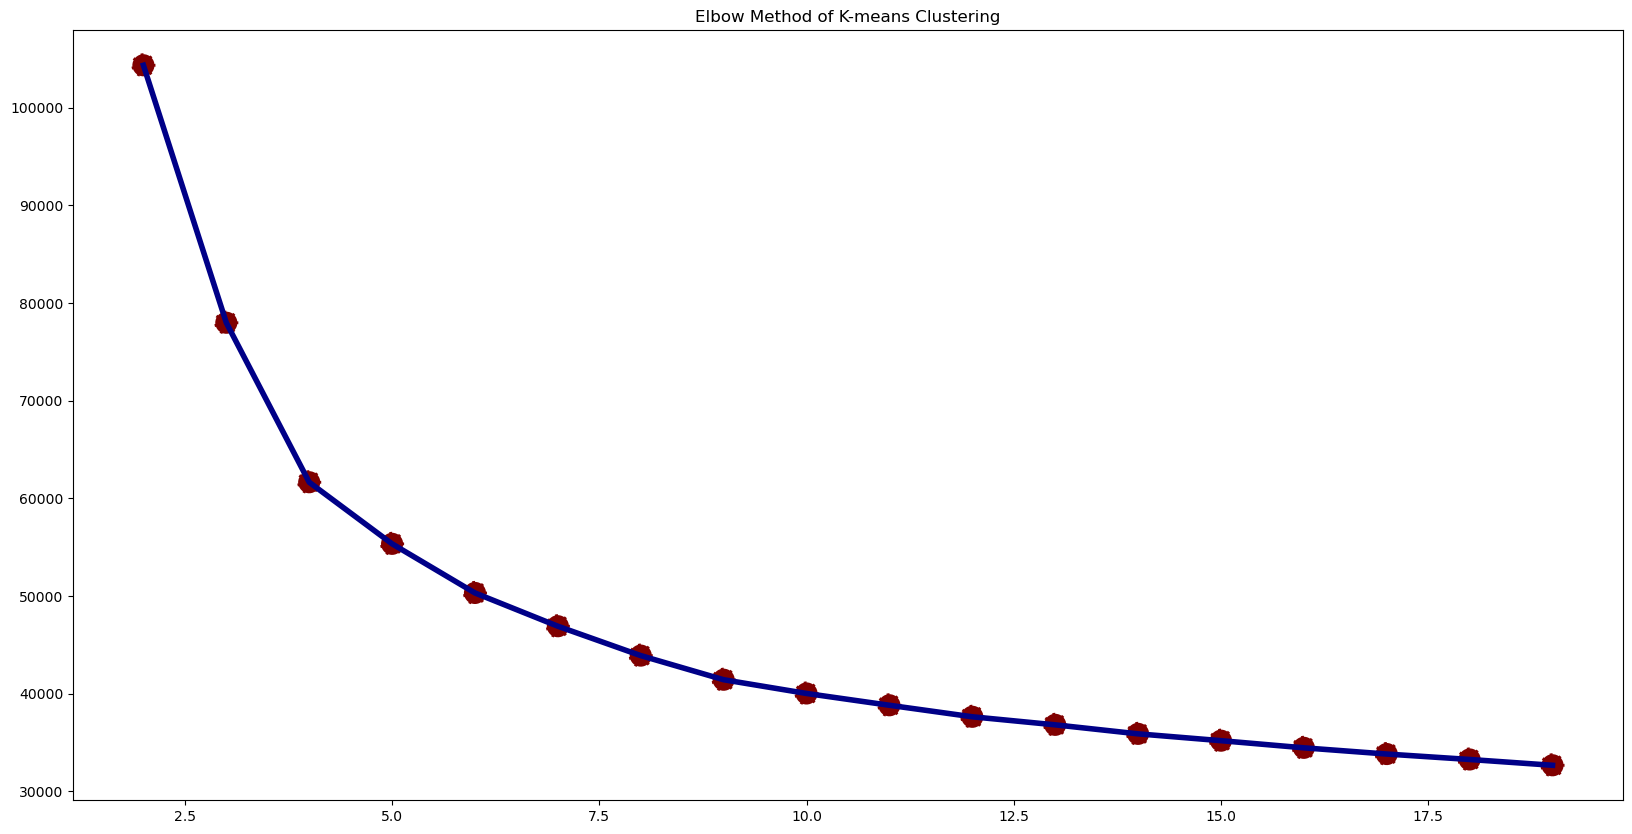

In [87]:
from sklearn.cluster import KMeans
X = data_std.drop(columns=['ID', 'Year_Birth', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
# X = data_std[numerical_features].copy()
inertia = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')

## K-Means Clustering

In [120]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['Cluster'] = kmeans.labels_
new_data['Cluster'] = kmeans.labels_

In [121]:
X.tail()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Cluster
2235,2,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,0,0,0,0,0,0,0.0,0.0,0,0.151917,0.149069,0.070501,1,1.217598,0,18,3.600000,0
2236,4,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,0,0,0,1,0,0,0.0,0.0,0,1.904422,1.979184,2.741110,1,-0.270546,1,22,3.142857,0
2237,2,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,0,1,0,0,0,0,0.0,0.0,0,-1.016420,-0.932363,-1.264803,0,1.051696,1,19,3.166667,0
2238,3,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,0,0,0,0,0,0,0.0,0.0,0,1.069896,1.147313,0.070501,1,0.391404,0,23,7.666667,3
2239,4,0.024705,1.039938,0.909066,-0.311405,-0.655568,-0.587058,-0.472705,-0.651038,-0.633880,-0.443313,0.351713,-0.396043,-0.571082,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,1.236801,1.147313,1.405806,1,-0.721800,0,11,1.571429,1


### Shilouette Score

For n_clusters = 2, silhouette score is 0.4698316806792188)
For n_clusters = 3, silhouette score is 0.4487235404801975)
For n_clusters = 4, silhouette score is 0.4006612471235226)
For n_clusters = 5, silhouette score is 0.37783853194541556)
For n_clusters = 6, silhouette score is 0.2547104207391342)
For n_clusters = 7, silhouette score is 0.2427097484301361)
For n_clusters = 8, silhouette score is 0.225265474602491)
For n_clusters = 9, silhouette score is 0.22497624075788292)
For n_clusters = 10, silhouette score is 0.21261216415528306)


<AxesSubplot:>

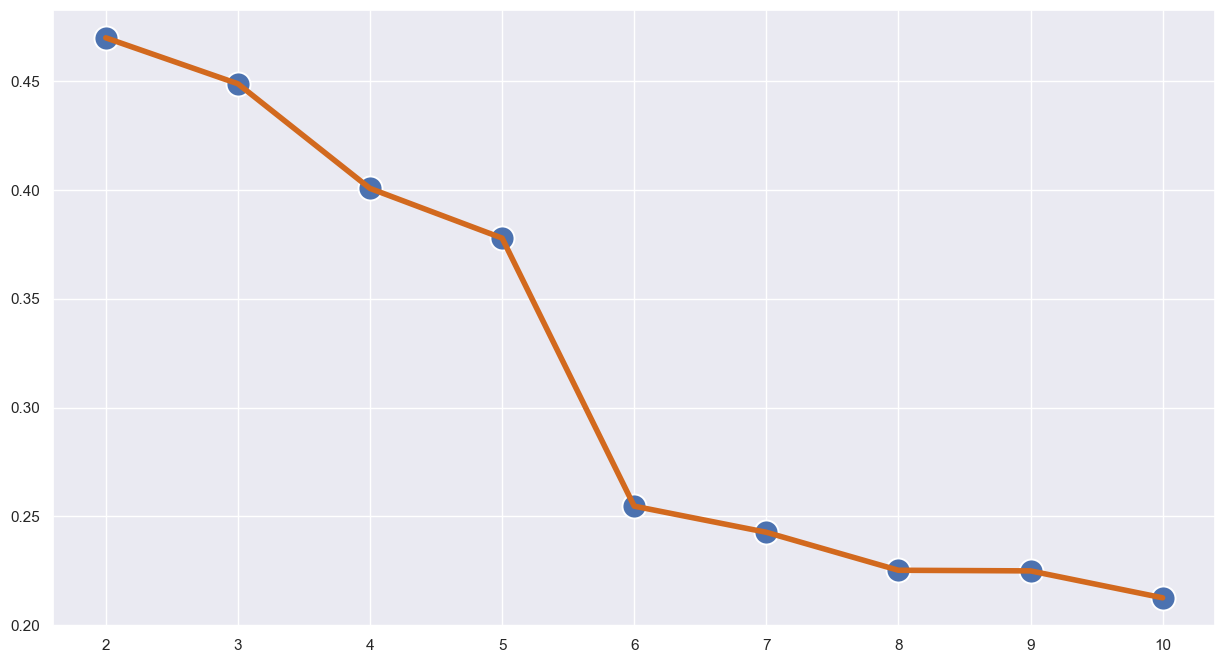

In [101]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    clusters = kmeans.fit(X)
    preds = clusters.predict(X)
    # inertia.append(kmeans.inertia_)
    
    score = silhouette_score(X, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))

plt.figure(figsize=(15, 8))
# plt.plot()

sns.lineplot(x=range(2, 11), y=silhouette, color='chocolate', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=silhouette, s=300)

In [124]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(15,8))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

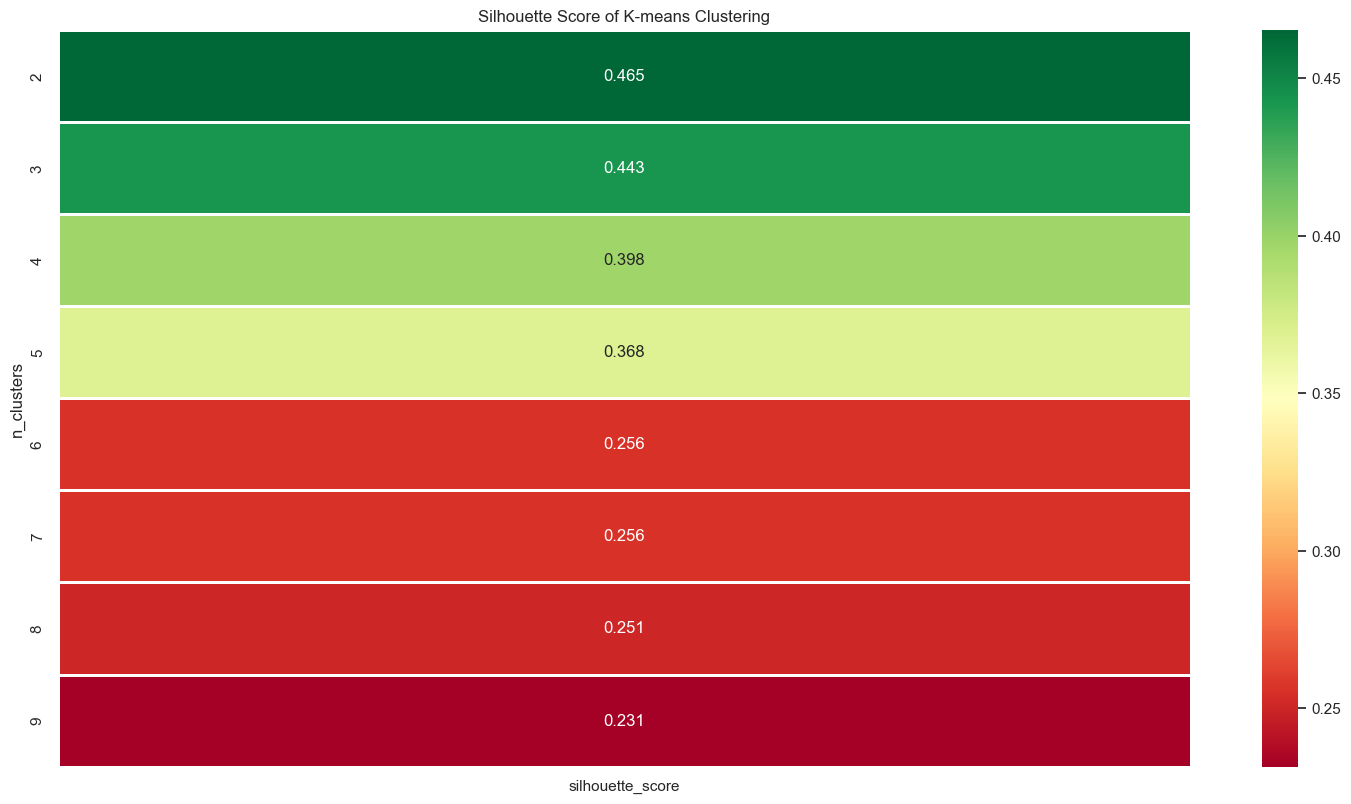

In [125]:
visualize_silhouette_layer(X)

# Customer Personality Analysis

## Cluster Analysis & Interpretation

### Statistical Summary per Cluster

In [126]:
new_data[numerical+['Cluster']].groupby('Cluster')['Income','total_amount_spent'].describe()

Income                                                                 \
         count          mean           std        min         25%         50%   
Cluster                                                                         
0        641.0  6.035277e+07  2.846038e+07  1730000.0  48195000.0  59060000.0   
1        935.0  3.415796e+07  1.446425e+07  3502000.0  25069000.0  33569000.0   
2        137.0  7.863174e+07  1.416946e+07  2447000.0  72679000.0  80124000.0   
3        503.0  6.835694e+07  1.327951e+07  7144000.0  60341000.0  67445000.0   

                                 total_amount_spent                \
                75%          max              count          mean   
Cluster                                                             
0        70792000.0  666666000.0              641.0  7.794774e+05   
1        41526500.0  162397000.0              935.0  7.997219e+04   
2        83829000.0  157146000.0              137.0  1.289168e+06   
3        75864000.0  160803000.0              503.0  1.181400e+06   

                                                                             
                   std       min       25%        50%        75%        max  
Cluster                                                                      
0        521536.042501    8000.0  385000.0   564000.0  1127000.0  2302000.0  
1         75810.264662    5000.0   37000.0    59000.0   100000.0  1376000.0  
2        432624.303275  277000.0  988000.0  1216000.0  1574000.0  2525000.0  
3        427497.728798  416000.0  859000.0  1095000.0  1482000.0  2524000.0

In [129]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'High Spender',
    3 : 'Mid Spender'
}

new_data['cluster_mapped'] = new_data['Cluster'].map(map_cluster)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mid Spender'),
  Text(1, 0, 'Risk of Churn'),
  Text(2, 0, 'Low Spender'),
  Text(3, 0, 'High Spender')])

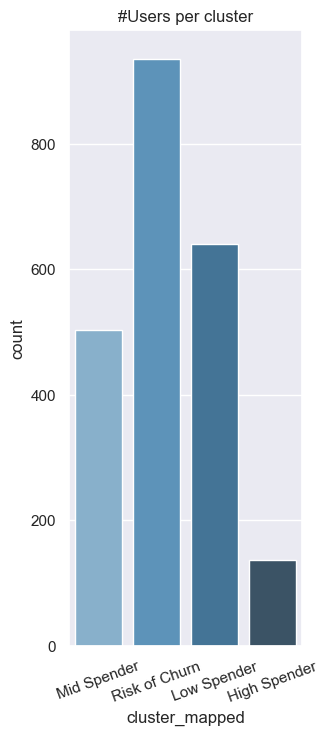

In [130]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=new_data['cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=20)

(0.0, 120000000.0)

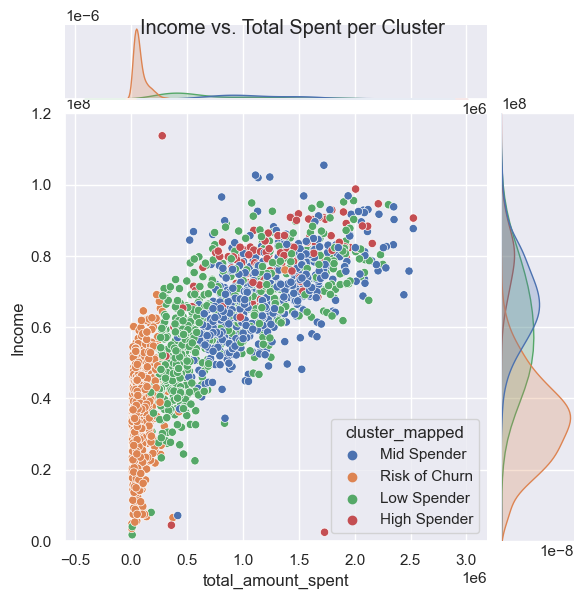

In [132]:
plot = sns.jointplot(x=new_data["total_amount_spent"], y=new_data["Income"], hue=new_data["cluster_mapped"])
plt.suptitle('Income vs. Total Spent per Cluster')
plot.ax_marg_y.set_ylim(0, 120000000)

### Total Income per Cluster

(0.0, 120000000.0)

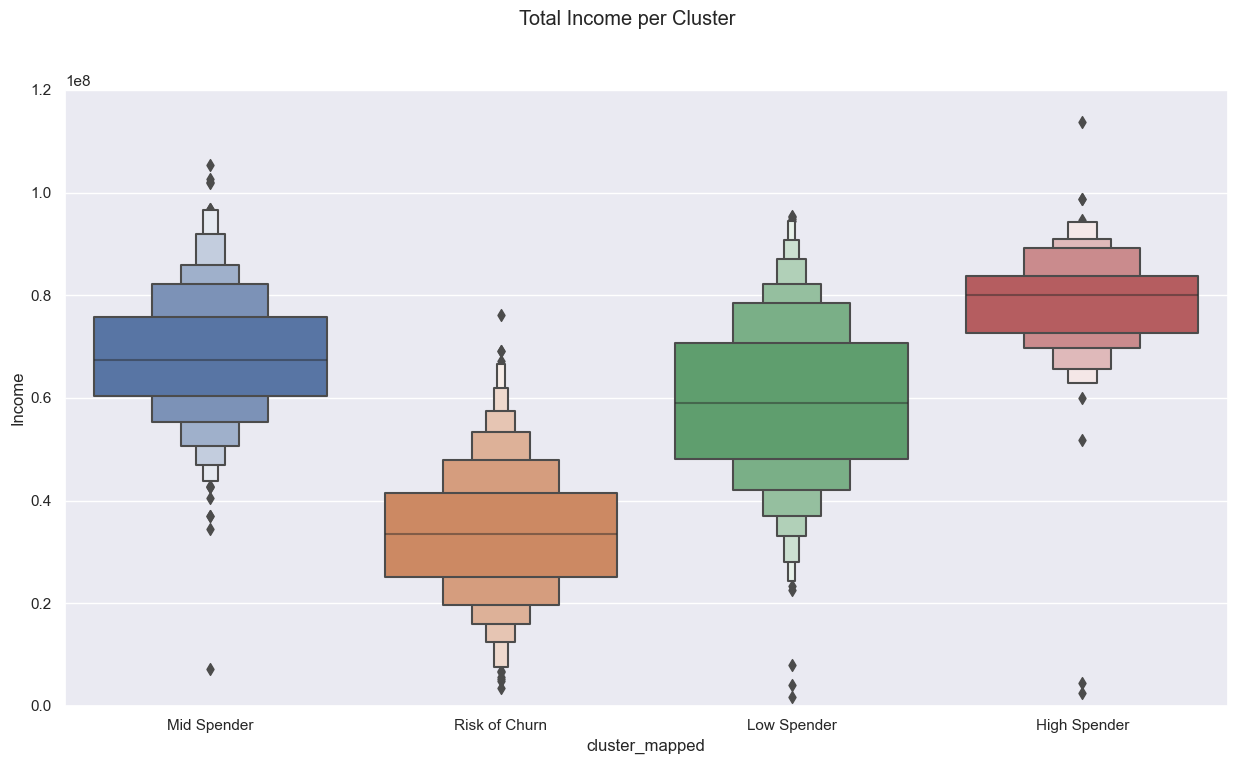

In [135]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=new_data['cluster_mapped'], y=new_data['Income'])
plt.suptitle('Total Income per Cluster')
plt.ylim(0, 120000000)

### Total Spending per Cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

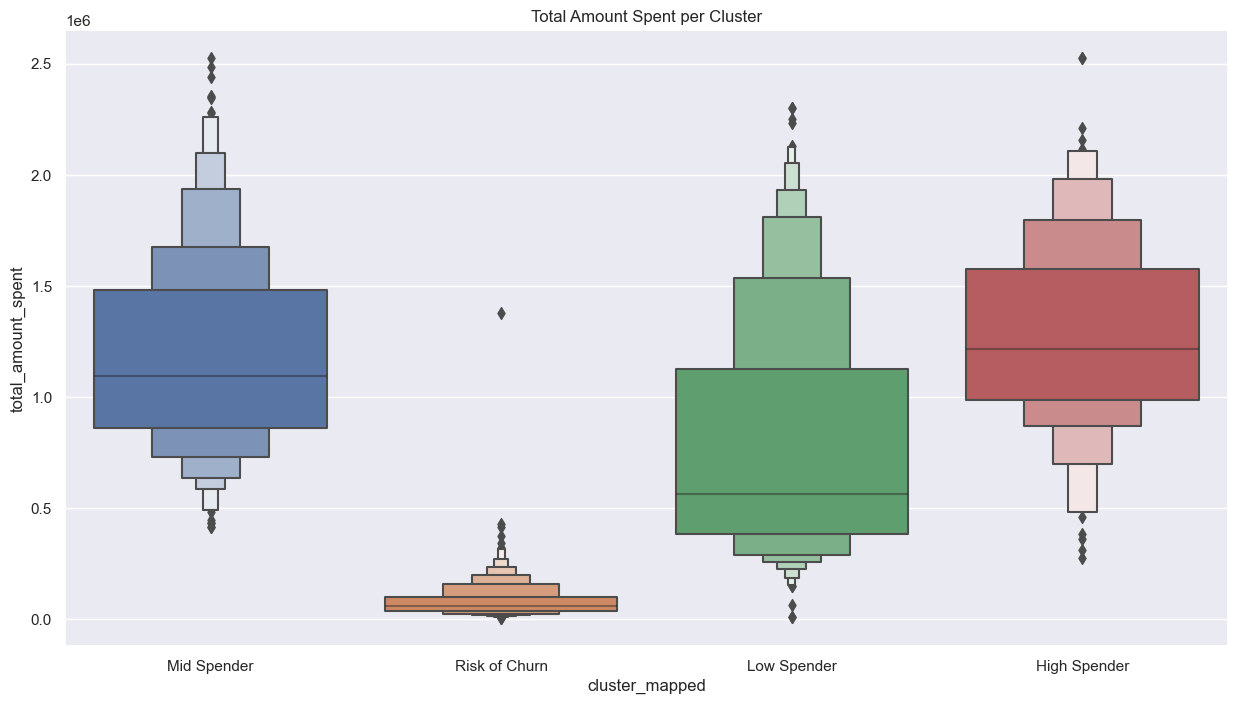

In [136]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=new_data['cluster_mapped'], y=new_data['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

### Total Visit Web per Cluster

Text(0.5, 1.0, 'Total Visit Web per Cluster')

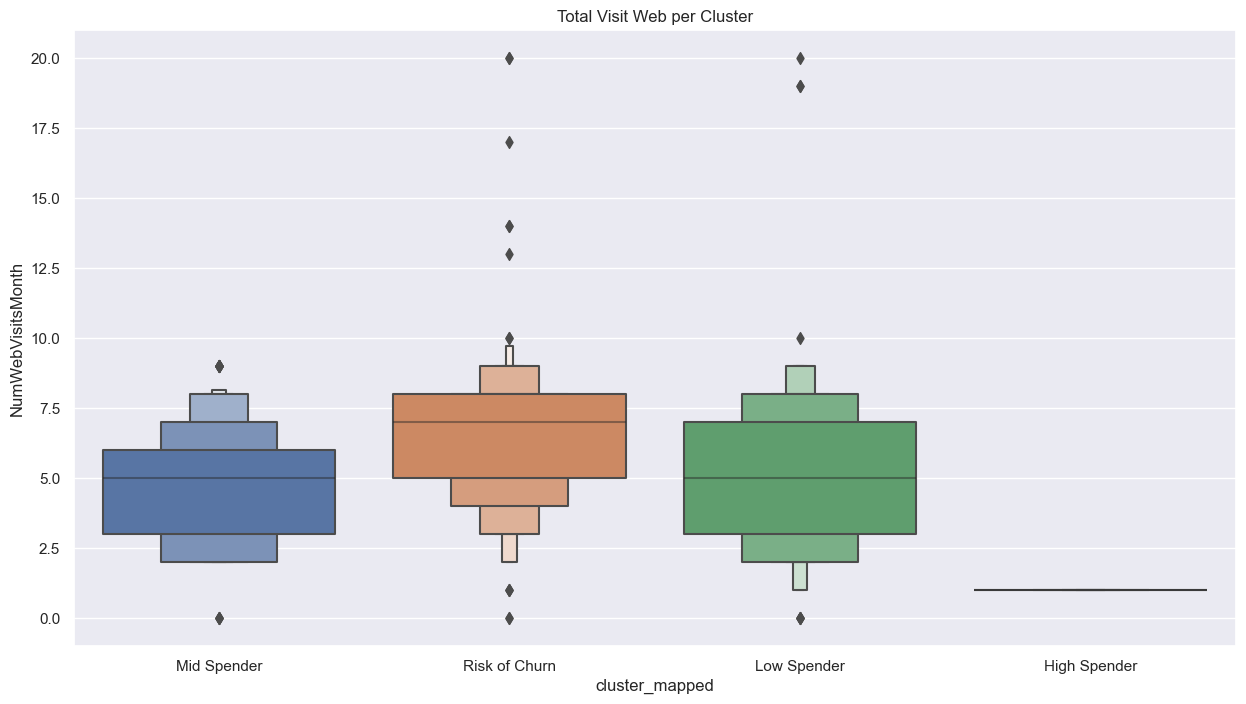

In [137]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=new_data['cluster_mapped'], y=new_data['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

### Deal Purchased per Cluster

Text(0.5, 1.0, 'Deal Puchased per Cluster')

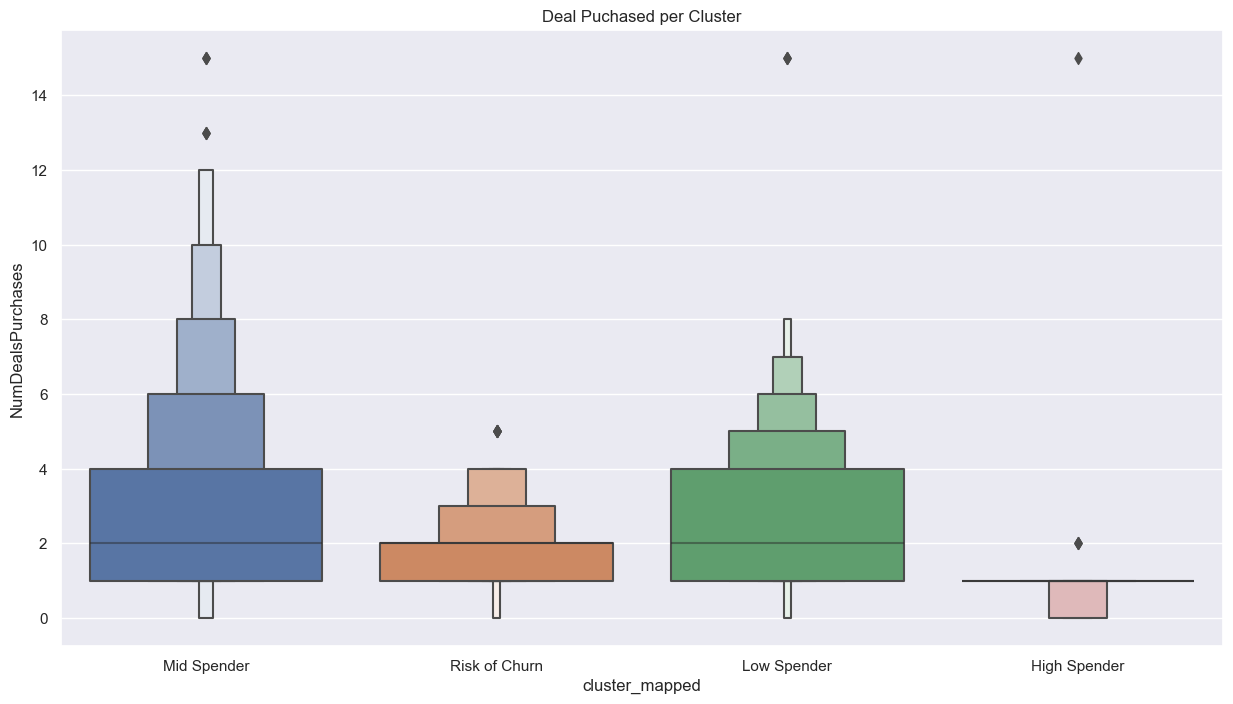

In [139]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=new_data['cluster_mapped'], y=new_data['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

### Conversion per Cluster

Text(0.5, 1.0, 'CVR per Cluster')

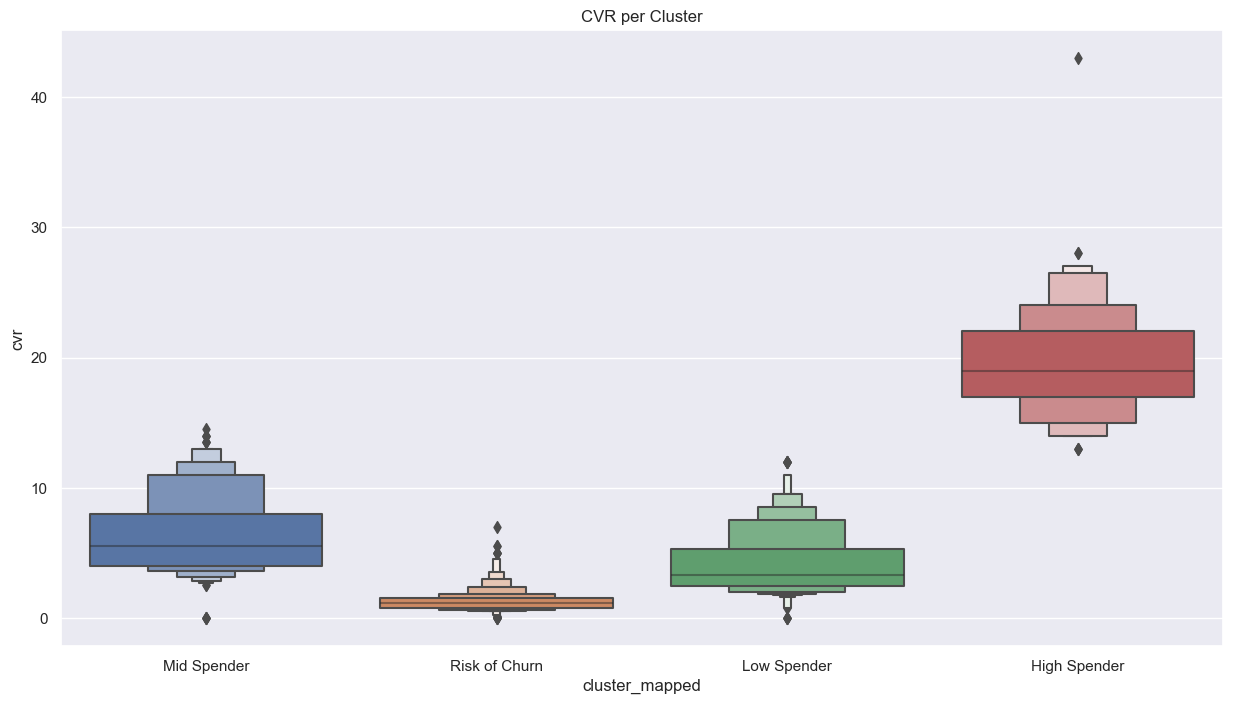

In [140]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=new_data['cluster_mapped'], y=new_data['cvr'])
plt.title('CVR per Cluster')

## Insight & Recommendation

1. Low Spender:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak
- Kelompok ini mengunjungi website cukup sering, kedua tersering setelah Cluster 1, dengan median sebanyak 5 kali dalam sebulan, walaupun demikian, kelompok ini cukup sering mencari promo yang masing-masing orangnya membeli promo 2 kali dalam sebulan (median)
- Namun, kelompok ini mempunyai total pendapatan dan pengeluaran terkecil kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 57 Juta untuk total pendapatan setahun, dan IDR 506K untuk pengeluaran dalam setahun


2. Risk of Churn:
- Kelompok ini adalah kelompok dengan jumlah user terbesar sebanyak 900 orang yang di dominasi oleh middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak.
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling kecil di setiap bulannya, yang masing-masing sebesar IDR 33.4 Juta untuk total pendapatan setahun, dan IDR 57K untuk pengeluaran dalam setahun
- Walaupun demikian, kelompok ini adalah kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan, walaupun demikian, mereka masih jarang untuk bertransaksi dan bahkan menggunakan promo pada transaksinya
- Secara campaign juga tidak banyak yang merespon dibandingkan dengan Kelompok lainnya. Mereka datang secara organic


3. Mid Spender:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 0-1 anak
- elompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 68 Juta untuk total pendapatan setahun, dan IDR 1.1 Juta untuk pengeluaran dalam setahun
- Walaupun cukup jarang untuk visit web, Kelompok ini adalah kelompok yang paling sering merespon campaign kita dan yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan


4. High Spender:
- Kelompok ini adalah kelompok dengan jumlah user terkecil sebanyak 137 orang yang di dominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah belum/tidak menikah dan belum mempunyai anak 
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 80 Juta untuk total pendapatan setahun, dan IDR 1.2 Juta untuk pengeluaran dalam setahun
- Cluster ini cukup banyak yang merupakan non-organic dengan merespon campaign, namun memiliki jumlah penggunaan promo yang paling sedikit dibandingkan dengan yang lainnya.
- Kelompok ini adalah kelompok yang mempunyai conversion rate terbesar untuk membeli produk kita, dan kita jangan sampai kehilangan mereka.

Recommendation:
1. Tetap monitor transaksi dan retensi dari kelompok High Spender, Fokus untuk tingkatkan service agar kelompok kelompok ini tidak churn
2. Untuk kelompok Mid Spender dapat dilakukan analisis lebih lanjut bagaimana agar meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita
3. Untuk kelompok Low Spender dan Risk to Churn, juga dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction, Mereka mempunyai jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.

Potential Impact:
- Jika kita fokus untuk terus monitor kelompok High Spender, kita akan tetap mendapatkan potensial GMV sebesar IDR 176 Juta, sedangkan untuk kelompok Mid Spender sebesar IDR 66 Juta
- Jika kita dapat optimasi promo yang di spend untuk Mid Spender (dengan asumsi reduksi 50%)m kita dapat melakukan reduksi cost seevsar IDR 50 Juta